# Explorative Datenanalyse der Kriminalität in Chicago


## Load Data & Import Packages

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

current_dir = os.getcwd()

try:
    print("Loading data...")
    df = pd.read_csv(f"{current_dir}/../data/crimes.csv")
    print("Data successfully loaded.")
except Exception as e:
    print(f"Error while trying to load data. {type(e).__name__}: {e}")


Loading data...
Data successfully loaded.


## Columns

In [3]:
df.columns.format()

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

## Count of crime instances per primary crime type.

#### Table

In [21]:
crimes_per_type = pd.DataFrame(df.groupby('Primary Type').size().sort_values(ascending=False).rename('Count').reset_index())

other_threshold = 30000

crimes_over_threshold = crimes_per_type[crimes_per_type['Count'] > other_threshold]
crimes_below_threshold = crimes_per_type[crimes_per_type['Count'] < other_threshold]

combined_crimes = crimes_over_threshold.append(pd.DataFrame(crimes_below_threshold.Count.sum(), index = ["Other"], columns=["Count"]))

combined_crimes.fillna(f"Other ({crimes_below_threshold['Primary Type'].size} types of crime)", inplace=True)

combined_crimes

,Count,Primary Type
0,1417696,THEFT
1,1232015,BATTERY
2,771356,CRIMINAL DAMAGE
3,710760,NARCOTICS
4,418441,OTHER OFFENSE
5,418375,ASSAULT
6,387936,BURGLARY
7,314156,MOTOR VEHICLE THEFT
8,262300,DECEPTIVE PRACTICE
9,255578,ROBBERY


#### Plot

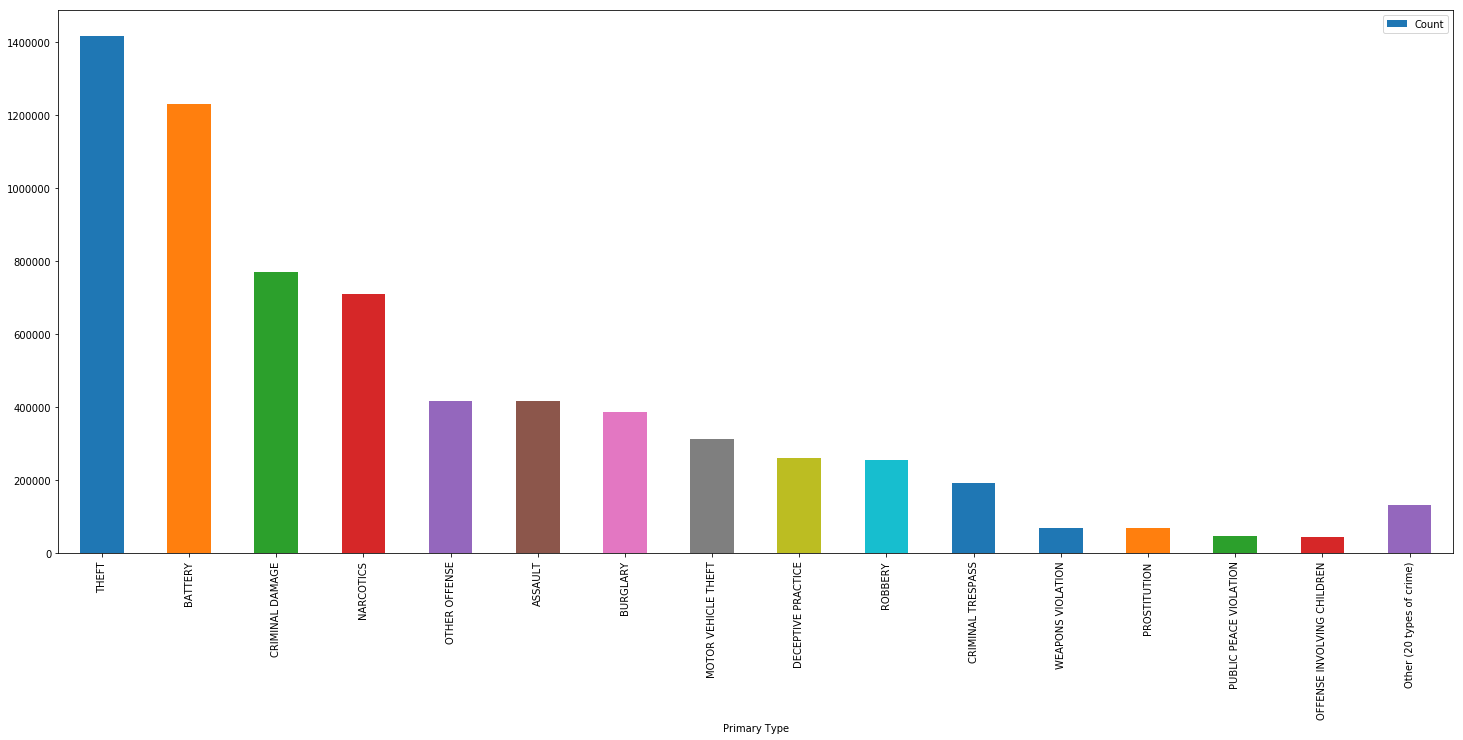

In [19]:
combined_crimes.plot(kind='bar', x='Primary Type', y='Count', figsize=(25,10))
plt.show()